In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [14]:
classifierDF = pd.read_csv("w3classif.csv")
regressionDF = pd.read_csv("w3regr.csv")
# print(classifierDF)
# print(regressionDF)

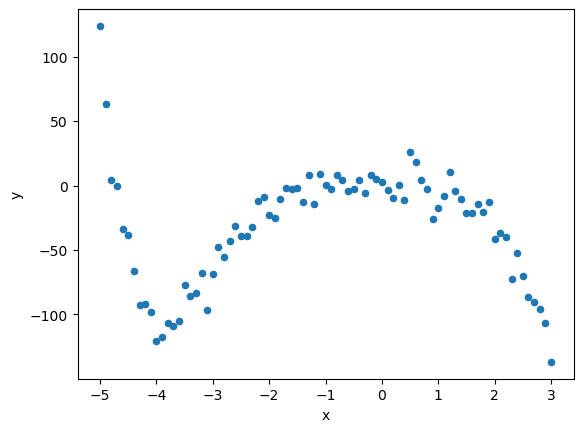

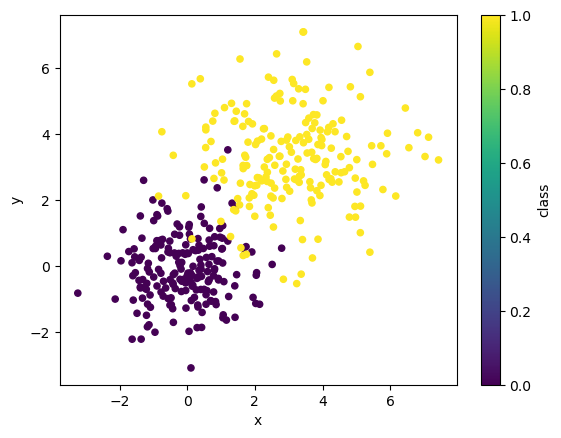

In [15]:
ax = regressionDF.plot.scatter(x=0, y=1)
ax2 = classifierDF.plot.scatter(x=0, y=1, c=2, colormap='viridis')

In [16]:
regrTrainSet, regrTestSet = train_test_split(regressionDF, test_size=0.3, random_state=42, shuffle=True)
classTrainSet, classTestSet = train_test_split(classifierDF, test_size=0.3, random_state=42, shuffle=True)

In [17]:
X_train = classTrainSet.drop(columns=['class'])
y_train = classTrainSet['class']
X_test = classTestSet.drop(columns=['class'])
y_test = classTestSet['class']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# Create the k-NN classifier with k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
# Make predictions on the training set and calculate the training loss
y_train_pred = knn.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_loss = 1 - train_acc

# Make predictions on the test set and calculate the test loss
y_test_pred = knn.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_loss = 1 - test_acc

print('Training loss: {:.4f}'.format(train_loss))
print('Test loss: {:.4f}'.format(test_loss))

Training loss: 0.0393
Test loss: 0.0167


In [20]:
# Plot the decision regions and data points
h = 0.02  # step size in the mesh

# Create a meshgrid of the feature values
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on the meshgrid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/var/folders/ys/b1y9111d04g2fcfz1tjzzyy00000gn/T/ipykernel_31890/2176101861.py:5: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, marker='x', edgecolors='k')


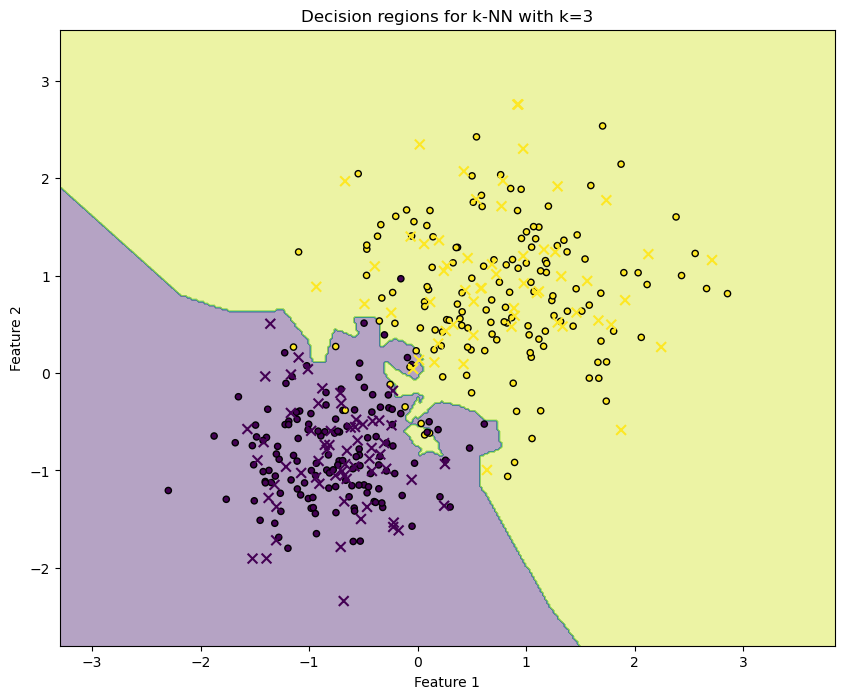

In [21]:
# Plot the decision regions and training/test data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, marker='x', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Decision regions for k-NN with k={k}')
plt.show()

In [39]:
# Train decision tree classifier
maxDepth = 5
clf = DecisionTreeClassifier(random_state=42, max_depth=maxDepth)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [40]:
# Define the meshgrid of points to evaluate the decision function
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [41]:
# Predict on the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [42]:
# Predict on training and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [43]:
# Compute training and test loss
train_loss = 1 - accuracy_score(y_train, y_train_pred)
test_loss = 1 - accuracy_score(y_test, y_test_pred)

print("Training loss: {:.4f}".format(train_loss))
print("Test loss: {:.4f}".format(test_loss))

Training loss: 0.0107
Test loss: 0.0250


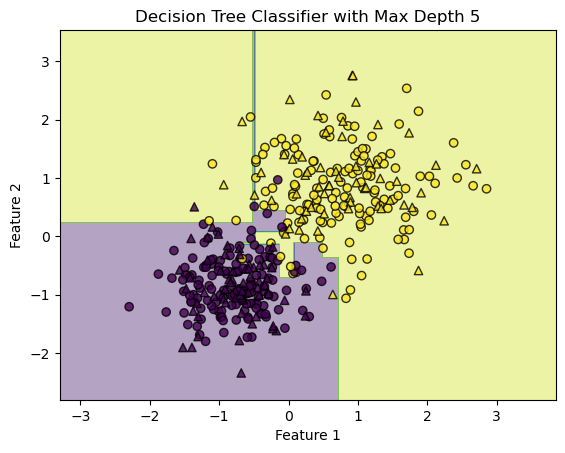

In [44]:
# Plot the decision regions and the data points
fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8, marker='o', edgecolors='black')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8, marker='^', edgecolors='black')
ax.set_title(f"Decision Tree Classifier with Max Depth {maxDepth}")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.show()